In [22]:
from blackjack import BlackJack
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import softmax

pd.set_option('display.max_rows', 180)

In [6]:
#def choose_action(state, pi, epsilon, actions):
#    
#    if random.random() < epsilon:
#        return np.random.choice(actions)
#        
#    return pi[state]

In [23]:
game = BlackJack()
epochs = 1_000_000
alpha = .1

actions = ["hit", "stand", "double"]

Q = {state : {a : 0 for a in actions} for state in game.states}
pi = {state : np.random.choice(actions) for state in game.states}
N = {state : 0 for state in game.states}
rewards = [0] * epochs

for i in range(epochs):
    
    if i % (epochs / 10) == 0:
        print(i)
    
    game.start()
    first = True
    
    visited_states = []
    performed_actions = []
    
    while game.player_hand_sum < 21: # while the player hasn't busted
        
        state = game.get_current_state()
        
        action = pi[state]
        
        if first:
            #action = choose_action(state, pi, .5, actions) # facilitates exploring starts
            action = np.random.choice(actions)
            first = False
        
        visited_states.append(state)
        performed_actions.append(action)
        
        if action == "hit":
            game.hit()
        elif action == "stand":
            game.stand() # if we stand, the round ends
            break
        else:
            game.double()
            break
    
    reward = game.get_reward()
    rewards[i] = reward
    
    for s, a in zip(visited_states, performed_actions):
        
        N[s] += 1 # count occurences of states
        
        # update the Q-value
        Q[s][a] += (reward - Q[s][a]) / N[s]
        #Q[s][a] += alpha * (reward - Q[s][a])
        
    for s in visited_states:
        
        # update the policy
        pi[s] = max(Q[s], key = Q[s].get)
    

Object created
0
100000
200000
300000
400000
500000
600000
700000
800000
900000


In [24]:
def get_stats(game):
    wins = game.wins + game.blackjacks
    all_outcomes = wins + game.losses + game.draws
    print("Winrate: " + str(wins / all_outcomes))
    print("Drawrate: " + str(game.draws / all_outcomes))
    print("Loserate: " + str(game.losses / all_outcomes))
    print("BlackJack chance: " + str(game.blackjacks / all_outcomes))
    print("Ws: " + str(game.wins + game.blackjacks) + "; Ls: " + str(game.losses) + 
          "; Draws: " + str(game.draws) + "; BlackJacks: " + str(game.blackjacks))

In [25]:
sums = [a for (a,_,_) in pi]
ace = [b for (_,b,_) in pi]
card = [c for (_,_,c) in pi]
ps = np.array(list((map(lambda x: list(softmax(x)), [list(qs.values()) for qs in list(Q.values())]))))

df = pd.DataFrame({"sum" : sums, "ace" : ace, "card" : card, 
                   "action" : pi.values(), "n" : N.values()})

In [26]:
with_ace = df[df["ace"] == True][["sum", "card", "action"]]
no_ace = df[df["ace"] == False][["sum", "card", "action"]]

with_ace['action'] = with_ace['action'].map({"hit" : "red", "stand" : "blue", "double" : "green"})
no_ace['action'] = no_ace['action'].map({"hit" : "red", "stand" : "blue", "double" : "green"})

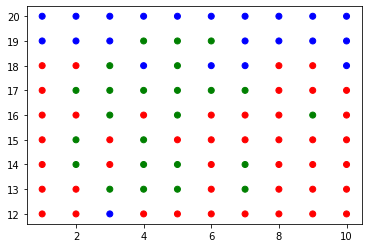

In [27]:
plt.scatter(with_ace["card"], with_ace["sum"], c = with_ace["action"])
plt.show()

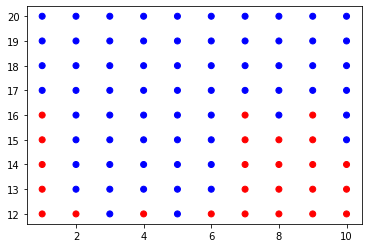

In [28]:
plt.scatter(no_ace["card"], no_ace["sum"], c = no_ace["action"])
plt.show()

In [29]:
game_test = BlackJack()
test_episodes = 1_000_000
rewards = [0]*test_episodes

for i in range(test_episodes):
    
    game_test.start()
    
    while game_test.player_hand_sum < 21: # while the player hasn't busted
        
        state = game_test.get_current_state()
        
        action = pi[state]
        
        if action == "hit":
            game_test.hit()
        elif action == "stand":
            game_test.stand() # if we stand, the round ends
            break
        elif action == "double":
            game_test.double()
            break
    rewards[i] = game_test.get_reward()

Object created


In [30]:
get_stats(game_test)

Winrate: 0.4385867910163685
Drawrate: 0.08080319756376095
Loserate: 0.4806100114198706
BlackJack chance: 0.048344118766653975
Ws: 460867; Ls: 505025; Draws: 84908; BlackJacks: 50800


In [31]:
len(list(filter(lambda x: x == 2, rewards))), len(list(filter(lambda x: x == -2, rewards)))

(14064, 12282)

In [32]:
sum(rewards)

-93176